#  Data Analysis from a Netflix Dataset #

## Che cosa verrà trattato in questo notebook?
### In questo notebook, analizzeremo e faremo delle predizioni sui dati relativi ai film e alle serie TV disponibili su Netflix.
### Netflix, con oltre 8000 film e serie TV sulla sua piattaforma e più di 200 milioni di abbonati in tutto il mondo a metà del 2021,
### rappresenta una fonte ricchissima di informazioni per comprendere le tendenze del mercato dell'intrattenimento.

# Il dataset tabellare che utilizzeremo contiene elenchi dettagliati di tutti i film e le serie TV disponibili su Netflix. Le informazioni includono:

### Show_id - id of the movie or tv show
### Type - product type, movie or tv show
### Title - name of the movie or tv show
### Director - movie's or tv show's director
### Сast - main actors of the project
### Country - country of the production
### Date_added - release date at Netflix
### Release_year - year of the release
### Rating - age rating (e.g. PG-13, TV-MA)
### Duration - duration of the project in mins for Movies and seasons for TV Shows
### Listed_in - genre
### Description - short description

### Obiettivi del Notebook

1. **Analisi dei Dati**: Esamineremo la distribuzione e le caratteristiche dei dati per ottenere una comprensione migliore del dataset. Visualizzeremo i dati attraverso vari grafici per identificare tendenze e pattern significativi.

3. **Pulizia e Preprocessing dei Dati**: Effettueremo le necessarie operazioni di pulizia dei dati per garantire che siano pronti per le analisi.

4. **Analisi Dettagliata**: Approfondiremo alcune domande specifiche, come la distribuzione dei generi nel tempo, le valutazioni medie per anno, la durata media dei film per genere, e altro ancora.

5. **Predizioni**: Utilizzeremo tecniche di machine learning per fare predizioni su aspetti specifici, come il successo di un film basato sulle sue caratteristiche, o la probabilità che un film o una serie TV ottenga alte valutazioni.

### Cosa Aspettarsi

Alla fine di questo notebook, avremo una chiara visione delle caratteristiche dei film e delle serie TV su Netflix, le tendenze principali del contenuto nel corso degli anni, e la cappossibilità di fare predizioni basate sui dati disponibili. I grafici e le visualizzazioni ci aiuteranno a comunicare i risultati in modo intuitivo e comprensibile.

**Iniziamo quindi la nostra analisi esplorativa dei dati per scoprire cosa possiamo imparare dai film e dalle serie TV disponibili su Netflix!**

# Impostare Il Documento #

## Importazione delle Librerie e Impostazione dello Stile

In [5]:
# Pandas è una libreria per la manipolazione e l'analisi dei dati strutturati
import pandas as pd

# NumPy è una libreria fondamentale per il calcolo scientifico in Python
import numpy as np

# Matplotlib è una libreria per la creazione di visualizzazioni statiche
import matplotlib.pyplot as plt

# Plotly Express è una libreria per creare grafici interattivi in modo semplice e rapido.
import plotly.express as px

# Seaborn è una libreria di visualizzazione dei dati basata su Matplotlib, fornisce una interfaccia per disegnare grafici attraenti e informativi
import seaborn as sns

# Impostazione dello stile di Seaborn per i grafici (da quando l'ho scoperto lo uso)
sns.set(style="darkgrid")

## Importazione e Lettura del Dataset

In [7]:
## Importazione del Dataset
# Specificare il percorso del file CSV contenente il dataset
file_path = 'netflix_titles.csv'

# Lettura del dataset in un DataFrame Pandas
df = pd.read_csv(file_path)

# Visualizzazione delle prime 5 righe del dataset per verificare l'importazione corretta
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Estrazioni Info Sul Dataset

In [9]:
# Controlliamo le dimensioni del dataset
print(f"Il dataset contiene {df.shape[0]} righe e {df.shape[1]} colonne.")

# Mostriamo un riepilogo delle informazioni del dataset
df.info()

# Controlliamo se ci sono valori mancanti nel dataset
missing_values = df.isnull().sum()
print("Valori mancanti per colonna:")
print(missing_values)

## Statistiche Descrittive del Dataset
# Otteniamo alcune statistiche descrittive delle colonne numeriche del dataset
df.describe()

# Visualizzazione delle colonne uniche per comprendere la diversità dei dati
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column} ha {df[column].nunique()} valori unici")
plt.show()

Il dataset contiene 8807 righe e 12 colonne.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Valori mancanti per colonna:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating    

In [10]:
# Contiamo il numero di occorrenze per ogni durata e visualizziamo i risultati.
duration = df['duration'].value_counts()
duration

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

# Inizio Analisi Del DataSet

***Una volta importate le librerie e stampato alcune info a riguardo del dataset, Possiamo iniziare con L'analisi dei dati del nostro dataset. Per analizzare questo tipo di dati, dobbiamo prima vedere con che dati stiamo lavorando***

## Importazione delle Librerie e Lettura del Dataset

In [15]:
# Impostazione dello stile di Seaborn per i grafici
sns.set(style="darkgrid")


# Visualizzazione delle prime 5 righe del dataset
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Informazioni di Base sul Dataset

In [21]:
# Controlliamo le dimensioni del dataset
print(f"Il dataset contiene {df.shape[0]} righe e {df.shape[1]} colonne.")

# Mostriamo un riepilogo delle informazioni del dataset
df.info()

# Controlliamo se ci sono valori mancanti nel dataset
missing_values = df.isnull().sum()
print("Valori mancanti per colonna:")
print(missing_values)

# Statistiche descrittive delle colonne numeriche del dataset
df.describe()

# Visualizzazione delle colonne uniche per comprendere la diversità dei dati
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column} ha {df[column].nunique()} valori unici")


Il dataset contiene 8807 righe e 12 colonne.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Valori mancanti per colonna:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating    

## Pulizia dei Dati

In [24]:
# Sostituire i valori mancanti con una stringa vuota o un valore predefinito
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

# Verifica della pulizia
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Analisi Esplorativa dei Dati (EDA)

## Distribuzione dei Tipi di Contenuto

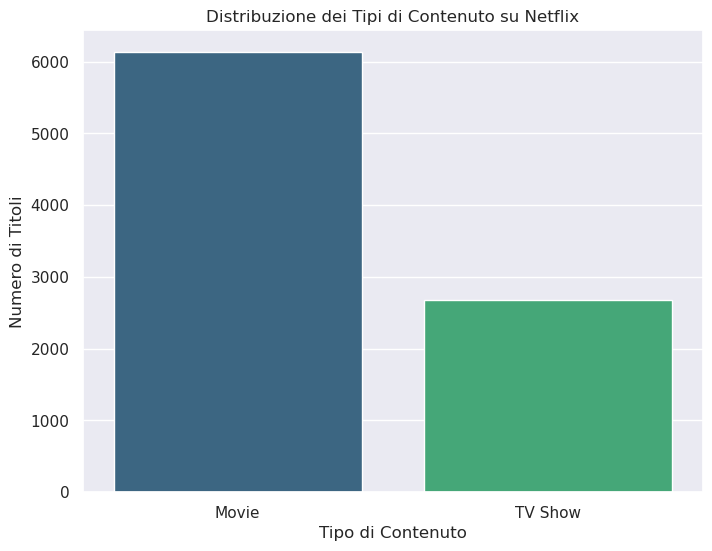

In [28]:
# Conteggio del numero di film e serie TV
content_type_counts = df['type'].value_counts()

# Creazione del grafico a barre per la distribuzione dei tipi di contenuto
plt.figure(figsize=(8, 6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')
plt.title('Distribuzione dei Tipi di Contenuto su Netflix')
plt.xlabel('Tipo di Contenuto')
plt.ylabel('Numero di Titoli')
plt.show()

## Distribuzione dei Contenuti per Anno di Rilascio

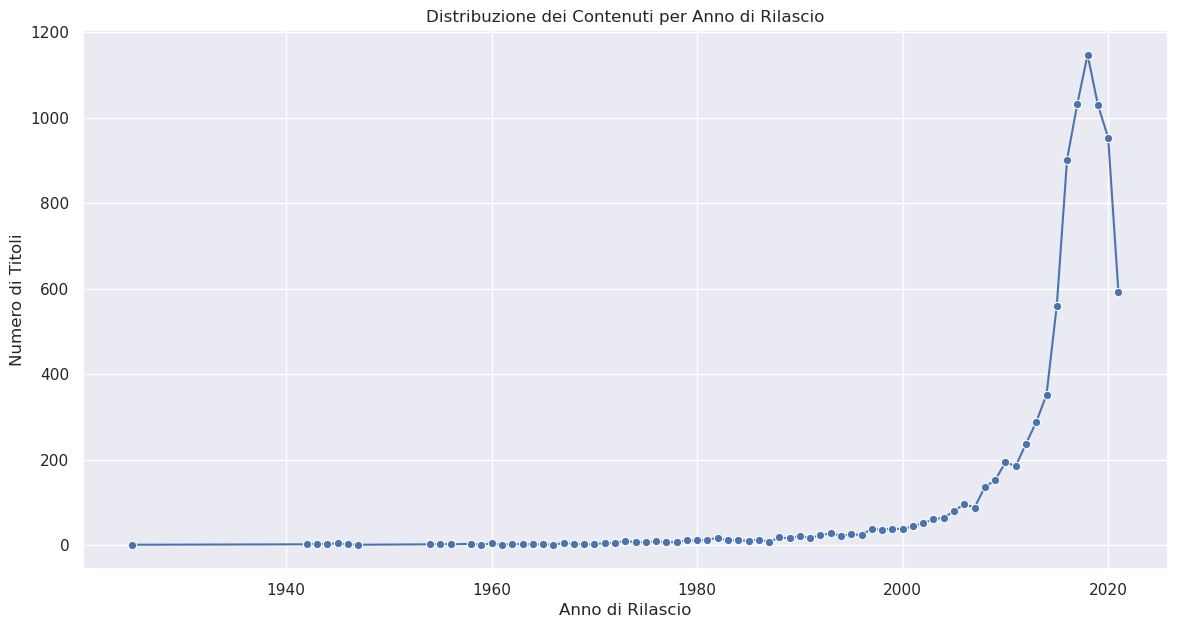

In [31]:
# Conteggio dei contenuti per anno di rilascio
release_year_counts = df['release_year'].value_counts().sort_index()

# Creazione del grafico a linee per la distribuzione dei contenuti per anno di rilascio
plt.figure(figsize=(14, 7))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values, marker='o')
plt.title('Distribuzione dei Contenuti per Anno di Rilascio')
plt.xlabel('Anno di Rilascio')
plt.ylabel('Numero di Titoli')
plt.show()


## Distribuzione dei Generi

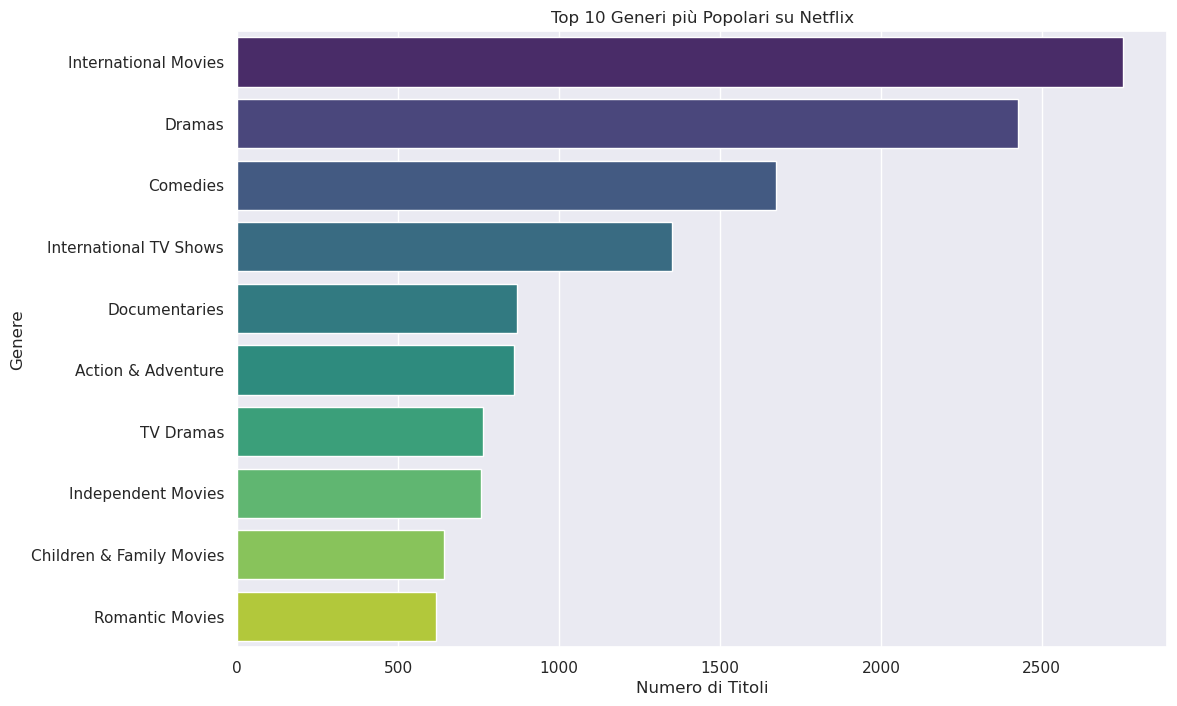

In [34]:
# Creazione di una lista di generi separati
df['genre_list'] = df['listed_in'].apply(lambda x: x.split(', '))

# Esplosione della lista di generi in più righe
df_genres = df.explode('genre_list')

# Conteggio dei generi
genre_counts = df_genres['genre_list'].value_counts().head(10)

# Creazione del grafico a barre per i generi più popolari
plt.figure(figsize=(12, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title('Top 10 Generi più Popolari su Netflix')
plt.xlabel('Numero di Titoli')
plt.ylabel('Genere')
plt.show()


## Tipi di contenuti piu richiesti su Netflix 

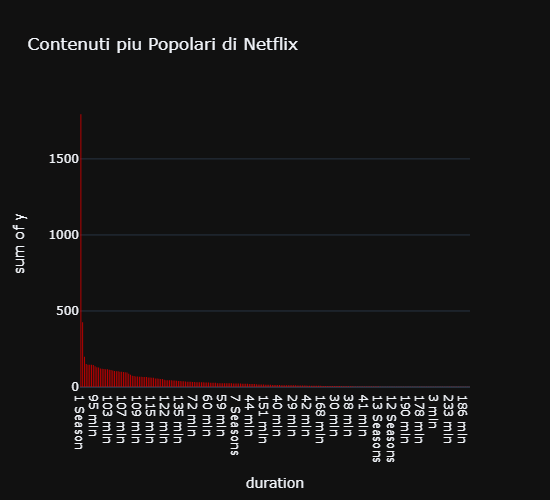

In [65]:
chart_colors = ['#cc0000', '#8c564b', '#ff7f0e', '#1f77b4',  '#FF9900', '#d1d6d5', '#333333', '#FFFFFF']

fig = px.histogram(duration, duration.index, duration.values, 
                   template= "plotly_dark",
                   color_discrete_sequence= chart_colors, 
                   width = 800, height = 500, 
                   title = 'Contenuti piu Popolari di Netflix'
                  )
fig.update_layout(bargap=0.5)

fig.show()

### Le Serie TV dalla 1 stagione sono le più popolari, mentre tra i film con durata di 97 e 92 minuti sono i più comuni.

### Suddividiamo i nostri dati e consideriamo separatamente le Serie TV e i Film nelle nostre successive analisi.

In [84]:
movies = df[df['type'] == 'Movie'].copy()

In [86]:
tv_shows = df[df['type'] == 'TV Show'].copy()

# Serie TV

## Anno Di Rilascio

In [90]:
# Creiamo una funzione per estrarre il mese e l'anno in modo sicuro
def extract_date_components(date_str):
    if isinstance(date_str, str) and len(date_str.split(', ')) == 2:
        month = date_str.split(' ')[0]
        year = date_str.split(', ')[1]
        return month, year
    else:
        return None, None

# Applichiamo la funzione al DataFrame
tv_shows_release['month'], tv_shows_release['year'] = zip(*tv_shows_release['date_added'].apply(extract_date_components))

# Controlliamo le prime righe del DataFrame per verificare i risultati
tv_shows_release.head()


,date_added,month,year
1,"September 24, 2021",September,2021
2,"September 24, 2021",September,2021
3,"September 24, 2021",September,2021
4,"September 24, 2021",September,2021
5,"September 24, 2021",September,2021


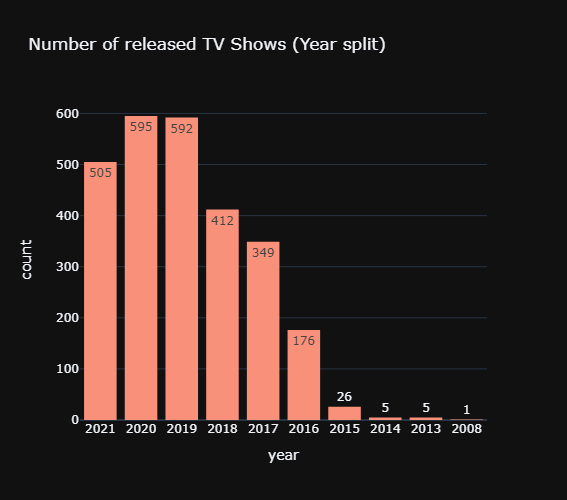

In [92]:
fig = px.histogram(tv_shows_release, x='year', 
                   template="plotly_dark",
                   color_discrete_sequence=['#F9917A'],
                   width=800, height=500,
                   text_auto=True,
                   title='Number of released TV Shows (Year split)')
fig.show()


## Valutazione

In [102]:
tvshow_rating = tv_shows['rating'].reset_index()
tvshow_rating = tvshow_rating.groupby('rating').count().reset_index().sort_values(by = 'index', ascending=False)

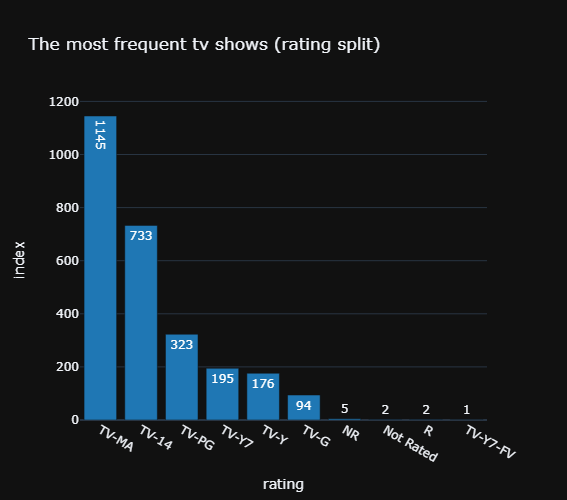

In [107]:
fig = px.bar(tvshow_rating,  'rating', 'index', 
             template= "plotly_dark",
             color_discrete_sequence= ['#1F77B4'],
             width = 800, height = 500,
             text_auto=True,
             title = 'The most frequent tv shows (rating split)'
            )

fig.show()

# Matrix Sui Mesi Di Rilascio

In [99]:
months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [52]:
tv_shows_release_matrix =  tv_shows_release.groupby('year')['month'].value_counts().unstack()[months_list].fillna(0).T
tv_shows_release_matrix

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
January,0.0,0.0,0.0,0.0,26.0,14.0,18.0,35.0,52.0,36.0
February,1.0,0.0,1.0,0.0,6.0,16.0,23.0,42.0,42.0,44.0
March,0.0,1.0,0.0,1.0,2.0,36.0,32.0,52.0,44.0,37.0
April,0.0,0.0,1.0,4.0,7.0,25.0,27.0,42.0,50.0,53.0
May,0.0,0.0,0.0,0.0,2.0,22.0,25.0,48.0,52.0,38.0
June,0.0,0.0,0.0,1.0,7.0,27.0,27.0,46.0,41.0,83.0
July,0.0,0.0,0.0,2.0,9.0,30.0,25.0,57.0,43.0,88.0
August,0.0,1.0,0.0,0.0,11.0,33.0,33.0,44.0,47.0,61.0
September,0.0,1.0,0.0,0.0,17.0,32.0,42.0,36.0,53.0,65.0


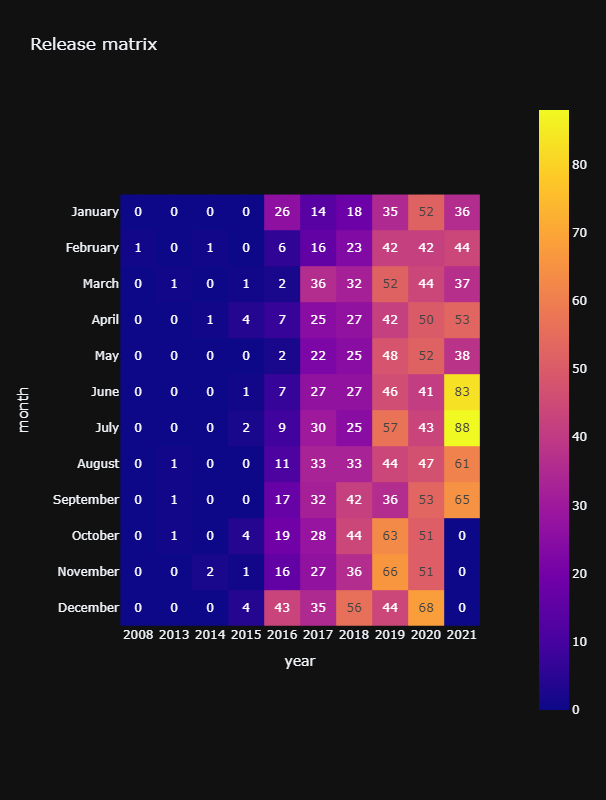

In [167]:
fig = px.imshow(tv_shows_release_matrix, 
                template= "plotly_dark",
                text_auto=True,
                width = 800, height = 800, 
                title = 'Release matrix')
fig.show()

# Predizioni

## Predizione della Popolarità dei Generi

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preparazione dei dati per il modello di machine learning
df_ml = df.copy()

# Creazione di nuove feature basate sui dati esistenti
df_ml['title_length'] = df_ml['title'].apply(len)
df_ml['description_length'] = df_ml['description'].apply(len)
df_ml['num_cast'] = df_ml['cast'].apply(lambda x: len(x.split(',')))

# Codifica delle feature categoriche
df_ml = pd.get_dummies(df_ml, columns=['type', 'rating', 'country'])

# Rimozione delle colonne non necessarie
df_ml.drop(['show_id', 'title', 'director', 'cast', 'date_added', 'listed_in', 'description', 'genre_list', 'duration'], axis=1, inplace=True)

# Creazione dei dati di addestramento e test
X = df_ml.drop('release_year', axis=1)
y = df_ml['release_year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creazione e addestramento del modello
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predizioni sui dati di test
y_pred = model.predict(X_test)

# Valutazione del modello
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.141316685584563
              precision    recall  f1-score   support

        1925       0.00      0.00      0.00         1
        1942       0.00      0.00      0.00         1
        1943       0.00      0.00      0.00         2
        1946       0.00      0.00      0.00         0
        1954       0.00      0.00      0.00         2
        1958       0.00      0.00      0.00         0
        1960       0.00      0.00      0.00         2
        1961       0.00      0.00      0.00         1
        1962       0.00      0.00      0.00         1
        1963       0.00      0.00      0.00         2
        1967       0.00      0.00      0.00         3
        1969       0.00      0.00      0.00         1
        1971       0.00      0.00      0.00         1
        1973       0.00      0.00      0.00         2
        1974       0.00      0.00      0.00         2
        1975       0.00      0.00      0.00         4
        1976       0.00      0.00      0.00         3

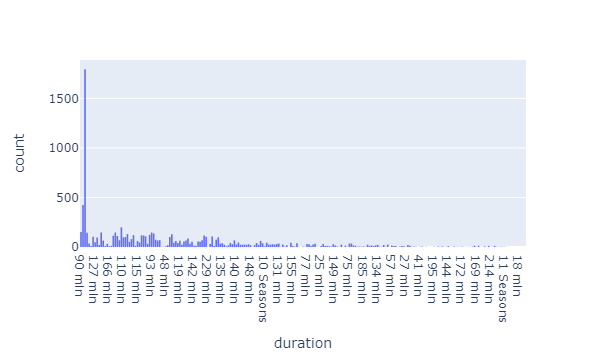

In [227]:
   import plotly.express as px
   fig = px.histogram(df, x='duration')
   fig.show()

In [111]:
countries = tv_shows['country'].fillna('No_info')
country_dict = Counter()
for country_list in countries:
    for country in country_list.replace(' ', '').split(','):
        country_dict[country] += 1

countries_sorted = sorted(country_dict.items(), key=lambda item: item[1], reverse=True)[:15]
states = [i for i, value in countries_sorted]
qty = [value for i, value in countries_sorted]
fig = px.pie(values=qty, names=states,
             template="plotly_dark", 
             title='Top-15 TV show production countries', 
             width=800, height=500,
             color_discrete_sequence=['#2CA02C', '#D62728', '#9467BD', '#E377C2', '#1F77B4', '#FF7F0E'])
fig.show()


NameError: name 'Counter' is not defined

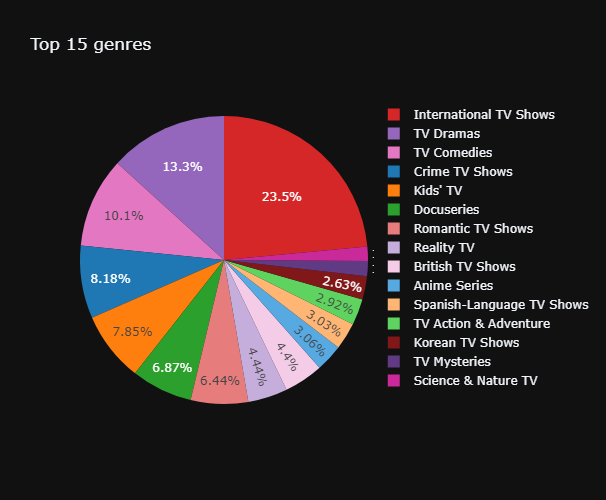

In [192]:
genres = Counter(', '.join(tv_shows['listed_in'].dropna()).replace(', ', ',').split(','))
genre_sorted = sorted(genres.items(), key=lambda item: item[1], reverse=True)[:15]
name = [i for i, value in genre_sorted]
value = [value for i, value in genre_sorted]
fig = px.pie(values=value, names=name,
             template="plotly_dark", 
             title='Top 15 genres', 
             width=800, height=500, 
             color_discrete_sequence=['#D62728', '#9467BD', '#E377C2', '#1F77B4', '#FF7F0E', '#2CA02C'])
fig.show()


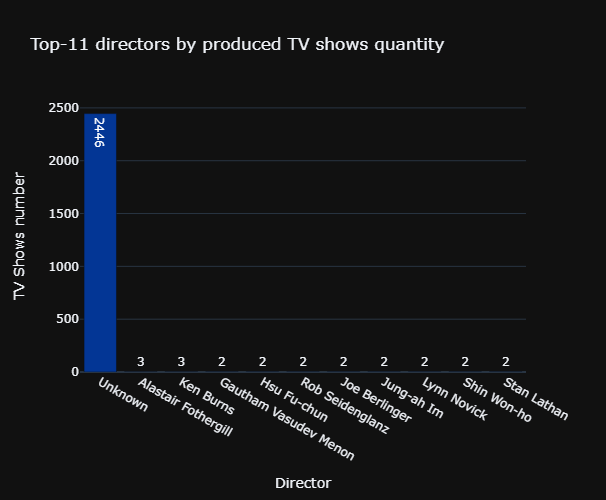

In [194]:
directors = Counter(', '.join(tv_shows['director'].dropna()).replace(', ', ',').split(','))
director_sorted = sorted(directors.items(), key=lambda item: item[1], reverse=True)[:11]
name = [i for i, value in director_sorted]
value = [value for i, value in director_sorted]
fig = px.bar(x=name, y=value, 
             template="plotly_dark",
             color_discrete_sequence=['#033695'],
             width=800, height=500,
             text_auto=True,
             title='Top-11 directors by produced TV shows quantity')
fig.update_layout(xaxis_title='Director', yaxis_title='TV Shows number')
fig.show()

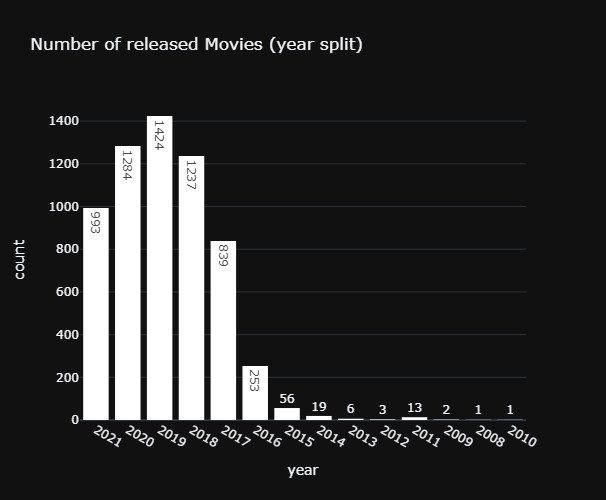

In [198]:
fig = px.histogram(movies_release, x='year', 
                   template="plotly_dark",
                   color_discrete_sequence=['white'],
                   width=800, height=500,
                   text_auto=True,
                   title='Number of released Movies (year split)')
fig.show()
